In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import *
from keras import regularizers
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization


num_classes = 100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [2]:
from keras.applications.densenet import DenseNet201,preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD


def add_new_last_layer(base_model, nb_classes):
    """
    添加最后的层
    输入
    base_model和分类数量
    输出
    新的keras的model
    """
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(nb_classes, activation='softmax')(x) #new softmax layer
    model = Model(input=base_model.input, output=predictions)
    return model

 
#搭建模型
model = DenseNet201(include_top=False)
model = add_new_last_layer(model, num_classes)
model.compile(optimizer=SGD(lr=0.001, momentum=0.9,decay=0.0001,nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])


Using TensorFlow backend.
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hpdbman/.conda/envs/py36/l

NameError: name 'num_classes' is not defined

In [4]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [3]:
datagen = ImageDataGenerator()

datagen.fit(x_train)

batch_size = 128
epochs = 300

train_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                )


Epoch 1/300
391/391 [==============================] - 113s 288ms/step - loss: 3.3292 - accuracy: 0.2434 - val_loss: 2.4182 - val_accuracy: 0.3905
Epoch 2/300
391/391 [==============================] - 70s 180ms/step - loss: 1.9365 - accuracy: 0.4923 - val_loss: 1.8623 - val_accuracy: 0.4967
Epoch 3/300
391/391 [==============================] - 70s 180ms/step - loss: 1.4304 - accuracy: 0.6112 - val_loss: 1.7192 - val_accuracy: 0.5347
Epoch 4/300
391/391 [==============================] - 70s 180ms/step - loss: 1.0945 - accuracy: 0.7013 - val_loss: 1.6504 - val_accuracy: 0.5497
Epoch 5/300
391/391 [==============================] - 70s 180ms/step - loss: 0.8372 - accuracy: 0.7755 - val_loss: 1.6136 - val_accuracy: 0.5635
Epoch 6/300
391/391 [==============================] - 70s 180ms/step - loss: 0.6233 - accuracy: 0.8408 - val_loss: 1.6053 - val_accuracy: 0.5681
Epoch 7/300
391/391 [==============================] - 70s 180ms/step - loss: 0.4581 - accuracy: 0.8918 - val_loss: 1.6119

train 0.9997287
valid 0.5928279998898506


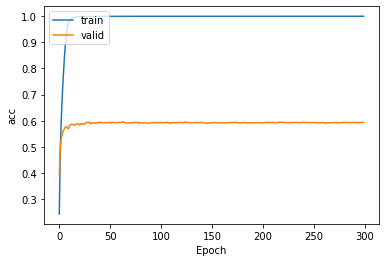

In [5]:
import util
# util.save_record(train_history.history, 'DenseNet.txt')
util.show_acc('DenseNet.txt', 100)